# Εργασία 2
## Επιχειρηματική Ευφυΐα και Ανάλυση Μεγάλων Δεδομένων
<br />

## Πρόβλεψη δημοτικότητας τραγουδιού με μοντέλα παλινδρόμησης
#### ΝΙΚΟΛΑΟΣ ΓΙΑΝΝΟΠΟΥΛΟΣ ΑΜ:18389140

Στην παρούσα εργασία επιχειρείται η πρόβλεψη δημοτικότητας τραγουδιού με μοντέλα παλινδρόμησης, για τον σκοπό αυτό χρησιμοποιήθηκε το dataset: https://www.kaggle.com/yasserh/song-popularity-dataset, το οποίο περιέχει 18835 χιλιάδες δείγματα και 15 χαρακτηριστικά .

#### **Φόρτωση απαραίτητων βιβλιοθηκών για μελέτη και επεξεργασία των δεδομένων**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

#### **Φόρτωση και μελέτη των δεδομένων**

In [6]:
data=pd.read_csv('song_data.csv')

In [7]:
data.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Παρατηρείται ότι τα δεδομένα αποτελούνται από 15 χαρακτηριστικά και 18835 δείγματα, εκ των οποίων 1 χαρακτηριστικό που περιέχει τα ονόματα των τραγουδιών είναι τύπου object, και τα υπόλοιπα είναι αριθμητικές τιμές τυπου int και float. Επιπλέον, τα δείγματα δεν περιέχουν άκυρες τιμές τύπου null

In [9]:
data.duplicated().sum()

3909

Παρατηρείται ότι υπάρχουν 3909 δείγματα με τα ίδια χαρακτηριστικά, οπότε τα αφαιρούμαι

In [10]:
data= data.drop_duplicates(keep='first')
data.duplicated().sum()

0

Έτσι, μένουν 14926 δείγματα

In [11]:
data.shape

(14926, 15)

#### **Ιστόγραμμα ποσότητας δειγμάτων με την δημοτικότητα**

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

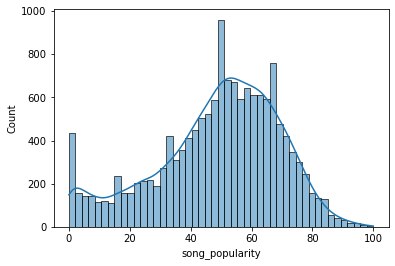

In [12]:
sns.histplot(data['song_popularity'], kde= True)

#### **Διαγράμματα διασποράς**

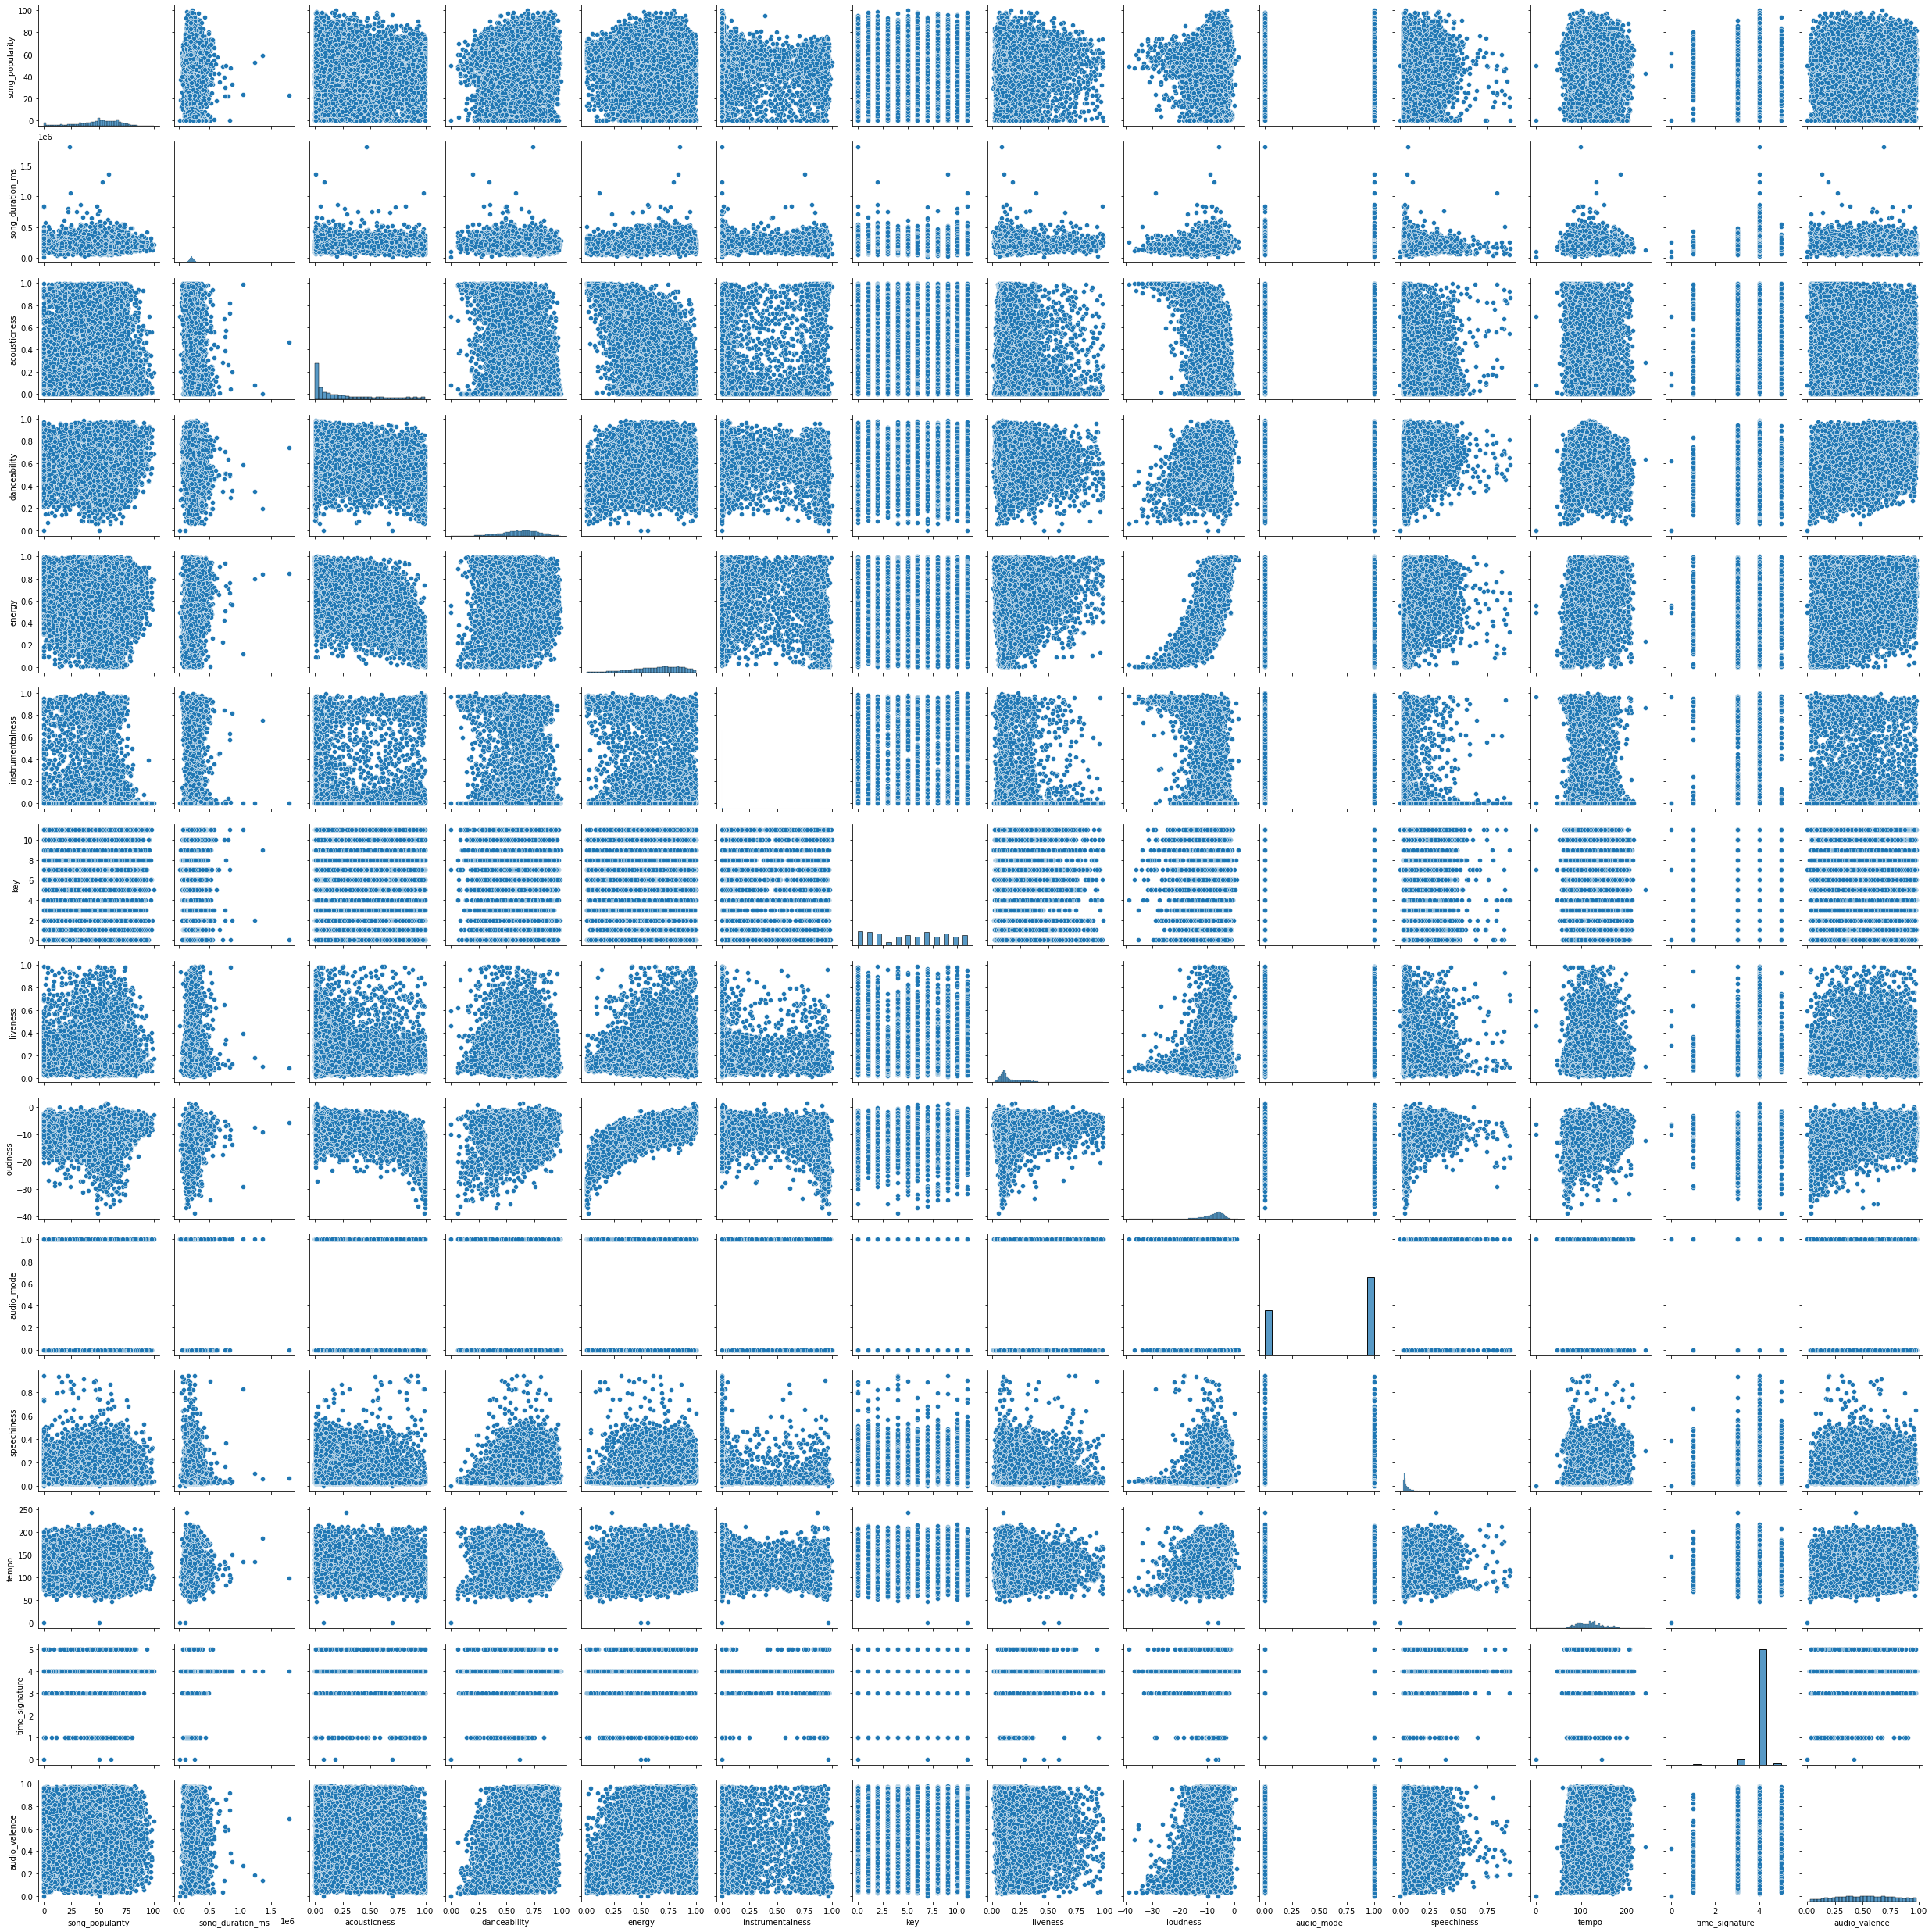

In [13]:
sns.pairplot(data.iloc[:,1:]);

#### **Πίνακας συσχέτισης για ζευγάρια χαρακτηριστικών**  

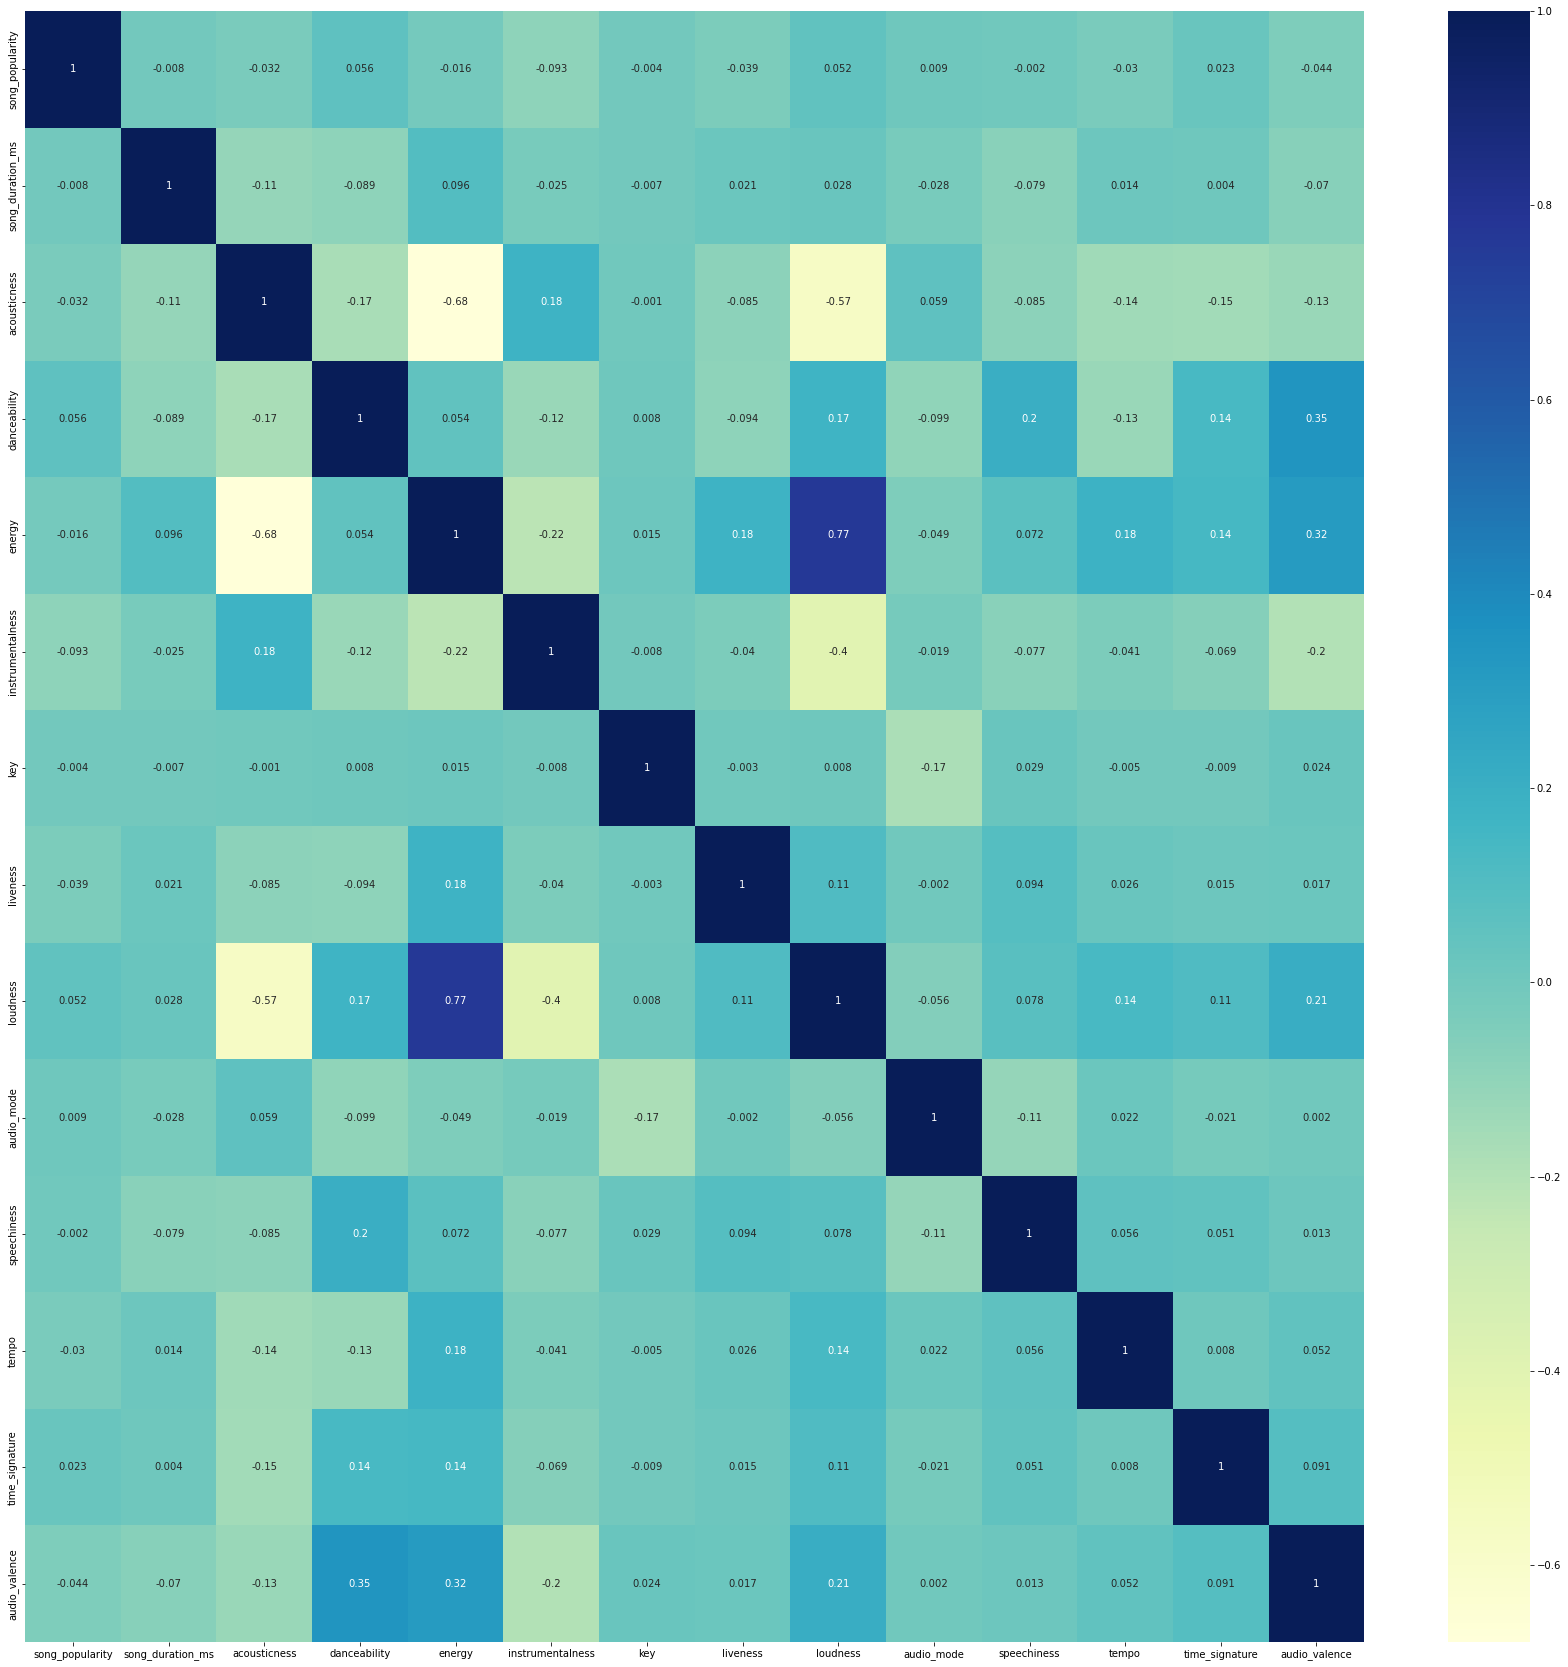

In [14]:
correlation_matrix = data.iloc[:,1:].corr().round(3)
f, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu');

#### **Στατιστικά των δεδομένων**

In [15]:
data.describe(include='all') 

song_name  song_popularity  song_duration_ms  acousticness  \
count      14926     14926.000000      1.492600e+04  14926.000000   
unique     13070              NaN               NaN           NaN   
top         Fire              NaN               NaN           NaN   
freq           8              NaN               NaN           NaN   
mean         NaN        48.750904      2.189496e+05      0.270453   
std          NaN        20.379465      6.234080e+04      0.298117   
min          NaN         0.000000      1.200000e+04      0.000001   
25%          NaN        37.000000      1.839435e+05      0.023600   
50%          NaN        52.000000      2.118455e+05      0.139000   
75%          NaN        63.750000      2.447200e+05      0.458000   
max          NaN       100.000000      1.799346e+06      0.996000   

        danceability        energy  instrumentalness           key  \
count   14926.000000  14926.000000      14926.000000  14926.000000   
unique           NaN           NaN               NaN           NaN   
top              NaN           NaN               NaN           NaN   
freq             NaN           NaN               NaN           NaN   
mean        0.624514      0.639763          0.092067      5.301152   
std         0.158081      0.221756          0.240451      3.592616   
min         0.000000      0.001070          0.000000      0.000000   
25%         0.524000      0.496000          0.000000      2.000000   
50%         0.636000      0.672000          0.000021      5.000000   
75%         0.740000      0.818000          0.005105      8.000000   
max         0.987000      0.999000          0.997000     11.000000   

            liveness      loudness    audio_mode   speechiness         tempo  \
count   14926.000000  14926.000000  14926.000000  14926.000000  14926.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.180435     -7.677232      0.631917      0.099419    121.105007   
std         0.145097      4.018670      0.482300      0.103546     29.044644   
min         0.010900    -38.768000      0.000000      0.000000      0.000000   
25%         0.093000     -9.389500      0.000000      0.037200     98.125000   
50%         0.122000     -6.750500      1.000000      0.054100    120.016000   
75%         0.224000     -4.991000      1.000000      0.113000    139.940750   
max         0.986000      1.585000      1.000000      0.941000    242.318000   

        time_signature  audio_valence  
count     14926.000000   14926.000000  
unique             NaN            NaN  
top                NaN            NaN  
freq               NaN            NaN  
mean          3.952968       0.526967  
std           0.316702       0.247758  
min           0.000000       0.000000  
25%           4.000000       0.332000  
50%           4.000000       0.527000  
75%           4.000000       0.727750  
max           5.000000       0.984000

Απεικόνιση της κατανομής των δεδομένων

<AxesSubplot:>

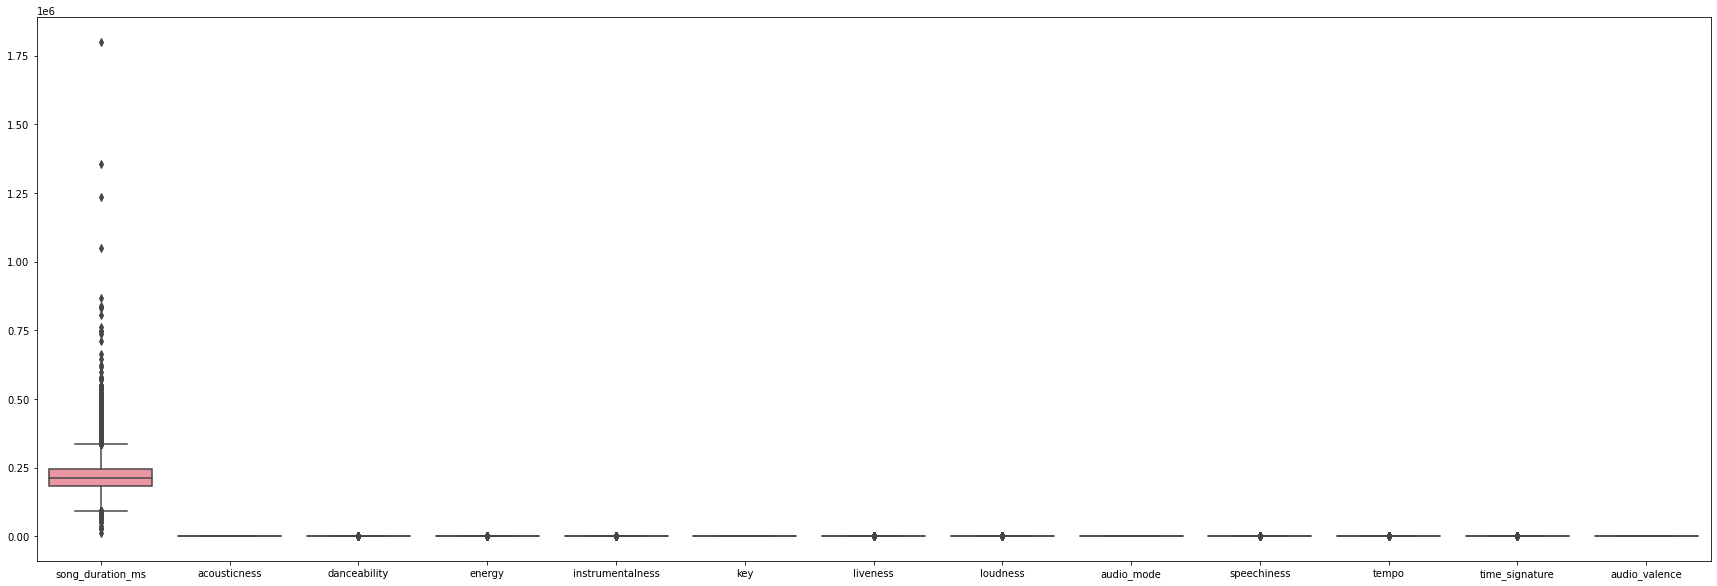

In [16]:
f, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data.iloc[:,2:])

Γινέται **κλιμάκωση των χαρακτηριστικών**, όπου τα δεδομένα μετατρέπονται έτσι ώστε να έχουν μέσο όρο(mean) ίσο με 0 και τυπική απόκλιση(standard deviation) ίση με 1. Αυτή η μετατροπή των δεδομένων βοηθάει κάποιες μεθόδους μηχανικής μάθησης.

In [17]:
scaler = StandardScaler().fit(data.iloc[:,2:])
data_std = scaler.transform(data.iloc[:,2:])
data_std = pd.DataFrame(data_std, index=data.iloc[:,2:].index, columns=data.iloc[:,2:].columns)

In [18]:
data_std.describe(include='all') 

song_duration_ms  acousticness  danceability        energy  \
count      1.492600e+04  1.492600e+04  1.492600e+04  1.492600e+04   
mean       8.074146e-17 -4.287368e-17 -6.010218e-16 -6.184402e-16   
std        1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00   
min       -3.319760e+00 -9.072294e-01 -3.950732e+00 -2.880253e+00   
25%       -5.615464e-01 -8.280666e-01 -6.358585e-01 -6.483127e-01   
50%       -1.139594e-01 -4.409574e-01  7.266409e-02  1.453783e-01   
75%        4.133935e-01  6.291280e-01  7.305779e-01  8.037811e-01   
max        2.535176e+01  2.433849e+00  2.293123e+00  1.620020e+00   

       instrumentalness           key      liveness      loudness  \
count      1.492600e+04  1.492600e+04  1.492600e+04  1.492600e+04   
mean      -4.142361e-16 -1.145220e-16 -6.583535e-17  1.329203e-16   
std        1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00   
min       -3.829055e-01 -1.475618e+00 -1.168461e+00 -7.736841e+00   
25%       -3.829055e-01 -9.189023e-01 -6.026148e-01 -4.260927e-01   
50%       -3.828188e-01 -8.382818e-02 -4.027424e-01  2.306143e-01   
75%       -3.616738e-01  7.512459e-01  3.002571e-01  6.684603e-01   
max        3.763612e+00  1.586320e+00  5.552077e+00  2.304877e+00   

         audio_mode   speechiness         tempo  time_signature  audio_valence  
count  1.492600e+04  1.492600e+04  1.492600e+04    1.492600e+04   1.492600e+04  
mean   2.971405e-15 -4.397007e-16  1.043131e-16    7.248769e-16  -2.477789e-16  
std    1.000034e+00  1.000034e+00  1.000034e+00    1.000034e+00   1.000034e+00  
min   -1.310260e+00 -9.601731e-01 -4.169755e+00   -1.248207e+01  -2.127014e+00  
25%   -1.310260e+00 -6.009007e-01 -7.912225e-01    1.485104e-01  -7.869528e-01  
50%    7.632072e-01 -4.376828e-01 -3.749550e-02    1.485104e-01   1.312361e-04  
75%    7.632072e-01  1.311653e-01  6.485318e-01    1.485104e-01   8.104242e-01  
max    7.632072e-01  8.127875e+00  4.173474e+00    3.306155e+00   1.844733e+00

Απεικόνιση της κατανομής των δεδομένων μετά την κλιμάκωση

<AxesSubplot:>

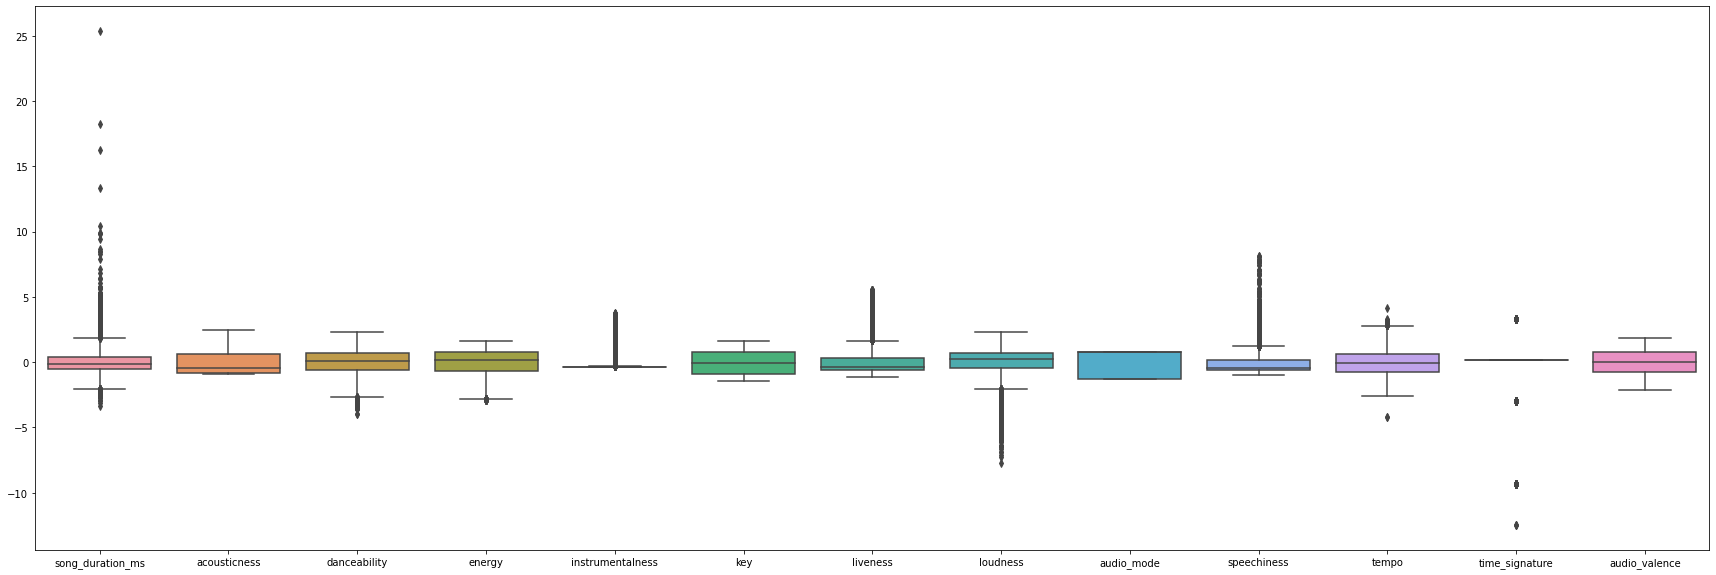

In [19]:
f, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data_std)

In [20]:
X = data_std # τοποθετούνται όλα τα χαρακτηριστικά εκτός του ονόματος και της δημοτικότητας
y= data['song_popularity']

In [21]:
X.head()

song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          0.695931     -0.888716     -0.812989  0.190474         -0.382783   
1         -0.032349     -0.872681     -0.521989  0.961617         -0.382905   
2          0.205064     -0.879827      0.711600 -0.797130          1.476165   
3         -0.032349     -0.818674     -1.097663  1.489242         -0.368141   
4          0.078225     -0.904033     -1.122968  0.569281         -0.382905   

        key  liveness  loudness  audio_mode  speechiness     tempo  \
0  0.751246 -0.837637  0.891427    0.763207    -0.676232  1.582272   
1 -0.640544 -0.499233  0.316093   -1.310260    -0.479212 -0.545696   
2 -1.475618  0.513914 -0.037518    0.763207    -0.195270  0.095580   
3 -1.475618 -0.540585  0.681649    0.763207     0.073218  0.046103   
4  1.307962 -0.464772  0.650046    0.763207    -0.657882  1.752740   

   time_signature  audio_valence  
0         0.14851      -0.213794  
1         0.14851      -0.633572  
2         0.14851      -0.819243  
3         0.14851      -1.327821  
4         0.14851       0.189839

In [22]:
y.head()

0    73
1    66
2    76
3    74
4    56
Name: song_popularity, dtype: int64

### **Επιλογή και εκπαίδευση μοντέλων μηχανικής μάθησης**

In [23]:
# Popular Regression Methods
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor

#### Φόρτωση βιβλιοθηκών αξιολόγισης

In [24]:
# Scores
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Χωρισμός των δεδομένων σε εκπαίδευσης και δοκιμής

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=59)

#### **Αξιολόγιση των μοντέλων και επιλόγη μοντέλου προς εκπαίδευση**

H μέθοδος του cross validation χρησιμοποιείται για την εκτίμηση της ικανότητας ενός μοντέλου μηχανικής μάθησης σε καινούργια δεδομένα, αυτό βοηθάει επίσης στην αποφυγή overfitting όταν κατασκευάζουμε το μοντέλο.

In [26]:
score = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
LRS=score.mean()
print(LRS)

-20.19850622059711


In [27]:
score = cross_val_score(SGDRegressor(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
SGDRS=score.mean()
print(SGDRS)

-20.21338624737365


In [28]:
score = cross_val_score(ElasticNet(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
ENS=score.mean()
print(ENS)
    

-20.303723256794314


In [29]:
score = cross_val_score(BayesianRidge(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
BRS=score.mean()
print(BRS)

-20.19838379637367


In [30]:
score = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
GBRS=score.mean()
print(GBRS)

-19.87052760741752


In [31]:
score = cross_val_score(SVR(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
SVRS=score.mean()
print(SVRS)

-20.167420617794516


In [32]:
score = cross_val_score(KernelRidge(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
KRS=score.mean()
print(KRS)

-52.76370775458638


In [33]:
score = cross_val_score(LGBMRegressor(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
LGBMRS=score.mean()
print(LGBMRS)

-19.926827265561137


In [34]:
score = cross_val_score(XGBRegressor(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
XGBRS=score.mean()
print(XGBRS)

-20.794472478416917


In [40]:
score = cross_val_score(CatBoostRegressor(), X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
CBRS=score.mean()
print(CBRS)

Learning rate set to 0.060701
0:	learn: 20.3984337	total: 27.2ms	remaining: 27.2s
1:	learn: 20.3565637	total: 41.1ms	remaining: 20.5s
2:	learn: 20.3205110	total: 53.2ms	remaining: 17.7s
3:	learn: 20.2852192	total: 62.7ms	remaining: 15.6s
4:	learn: 20.2470756	total: 74.1ms	remaining: 14.8s
5:	learn: 20.2191949	total: 86.4ms	remaining: 14.3s
6:	learn: 20.1921643	total: 94.2ms	remaining: 13.4s
7:	learn: 20.1593121	total: 109ms	remaining: 13.6s
8:	learn: 20.1316189	total: 121ms	remaining: 13.4s
9:	learn: 20.1012260	total: 133ms	remaining: 13.2s
10:	learn: 20.0790698	total: 168ms	remaining: 15.1s
11:	learn: 20.0572758	total: 181ms	remaining: 14.9s
12:	learn: 20.0336409	total: 191ms	remaining: 14.5s
13:	learn: 20.0160400	total: 201ms	remaining: 14.2s
14:	learn: 19.9957059	total: 214ms	remaining: 14.1s
15:	learn: 19.9752335	total: 223ms	remaining: 13.7s
16:	learn: 19.9610559	total: 234ms	remaining: 13.5s
17:	learn: 19.9390286	total: 248ms	remaining: 13.5s
18:	learn: 19.9207979	total: 257ms	re

In [36]:
score = cross_val_score(KNeighborsRegressor(n_neighbors=2), X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
bKNRS=score.mean()
bnn=2
for i in range(3,31):
    score = cross_val_score(KNeighborsRegressor(n_neighbors=i), X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    KNRS=score.mean()
    if(KNRS>bKNRS):
        bKNRS= KNRS
        bnn=i

print(bKNRS, "for nn=", bnn)

-20.28132183260016 for nn= 30


In [39]:
score = cross_val_score(RandomForestRegressor(n_estimators=500), X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
bRFRS=score.mean()
print(bRFRS, "for ne= 500")

-19.996928589802593 for ne= 500


#### **Εκπαίδευση καλύτερου μοντέλου**

In [44]:
GradBoostReg = GradientBoostingRegressor()
GradBoostReg.fit(X_train, y_train)

GradientBoostingRegressor()

#### **Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου**

In [45]:
y_pred = GradBoostReg.predict(X_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print("Model:{}".format('GradientBoostingRegressor()'))
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("R^2: {:.2f}".format(r2_score(y_test, y_pred)))  
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Model:GradientBoostingRegressor()
MSE: 380.49
R^2: 0.05
RMSE: 19.51
MAE: 15.50


In [49]:
y_pred

array([52.54463032, 43.59990187, 53.79568104, ..., 43.13471451,
       36.65742759, 52.92938659])

#### **Γράφημα πραγματικής εξόδου - εκτιμώμενης εξόδου**

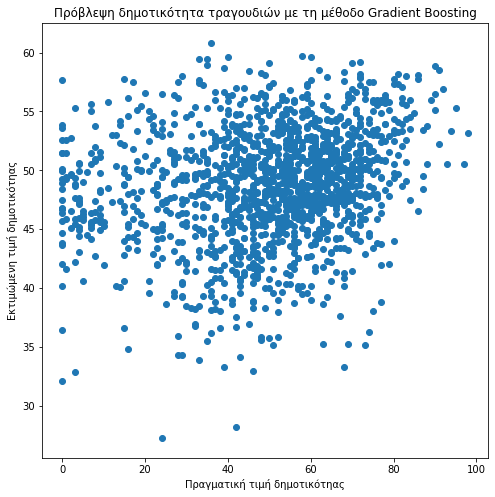

In [64]:
f, ax = plt.subplots(figsize=(8,8))
plt.scatter(y_test, y_pred)

#plt.plot(y_test, y_pred)
#f, ax = plt.subplots(figsize=(30,10))
plt.title('Πρόβλεψη δημοτικότητα τραγουδιών με τη μέθοδο Gradient Boosting')
plt.xlabel('Πραγματική τιμή δημοτικότηας')
plt.ylabel('Εκτιμώμενη τιμή δημοτικότηας')
plt.show()